# Extracting bibliographic information

<i>Copyright 2016, Pedro Belin Castellucci,

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.</i>


<i>BibTeX is a reference management software for formatting lists of references. The BibTeX tool is typically used together with the LaTeX document preparation system (...). The name is a portmanteau of the word bibliography and the name of the TeX typesetting software.

BibTeX makes it easy to cite sources in a consistent manner, by separating bibliographic information from the presentation of this information, similarly to the separation of content and presentation/style supported by LaTeX itself.</i> [Wikipedia](https://en.wikipedia.org/wiki/BibTeX)

One of the file extensions associated with BibTeX is <i>.bib</i>. In this Notebook we will parse a <i>.bib</i> file to create a profile of publications along a time horizon. This will motivate us to learn a bit about Strings, Files and Dictionaries in Julia.

# Strings

Strings in Julia are defined by double quotes.

In [25]:
exampleString = "Hello"

"Hello"

We can check its type.

In [26]:
typeof(exampleString)

String

It is also possible to iterate over strings in the same way we iterate over arrays. In fact, strings can be thought as arrays of chars.

In [27]:
for c in exampleString
    println(c, " is a ", typeof(c))
end

H is a Char
e is a Char
l is a Char
l is a Char
o is a Char


## Concatenation and methods <i>contains</i>, <i>strip</i>, <i>split</i> and <i>parse</i>

We will not dig deep into strings in Julia, but will take a look at the following methods: <i>contains</i>, <i>strip</i>, <i>split</i> and <i>parse</i>. Later, we will use the <i>contains</i> method to check if a string contains a certain substring. Before that, let us show how to concatenate two strings.

In [28]:
"Hello, " * "Julia!"

"Hello, Julia!"

Now, an example of the <i>contains</i> method.

In [29]:
println(contains("Hello", "el"))
println(contains("Hello", "EL"))

true
false


The <i>strip</i> method is used to remove left and right characters of a string. By default it removes "blank" spaces (e. g. '\n', '\t', ' '), but we can specify the characters to be remove. The header of these two options can be checked with <i>methods</i>.

In [30]:
methods(strip)

# 2 methods for generic function "strip":
strip(s::AbstractString) at strings/util.jl:89
strip(s::AbstractString, chars::Union{AbstractArray{Char,1},Char,Set{Char},Tuple{Vararg{Char,N<:Any}}}) at strings/util.jl:90

Let us see an example of the version without additional arguments.

In [31]:
stringExample = "  string to be stripped     \n"
strip(stringExample)

"string to be stripped"

For the second use, we can specify the characters which will be stripped.

In [32]:
stringExample = "pppHello, World!..."
strip(stringExample, ['p', '.'])

"Hello, World!"

The <i>split</i> method is used to separate "words" of a "phrase".

In [33]:
split("We have a phrase here.")

5-element Array{SubString{String},1}:
 "We"    
 "have"  
 "a"     
 "phrase"
 "here." 

But we can also specify a separator of the "words". Let as see an example of that: 

In [34]:
split("Now, let us separate the phrases. We will use the dot as separator. That's all we need", '.')

3-element Array{SubString{String},1}:
 "Now, let us separate the phrases" 
 " We will use the dot as separator"
 " That's all we need"              

Finally, the parse method is used to convert a string to different objects. We can check all its uses with <i>methods</i>.

In [35]:
methods(parse)

# 14 methods for generic function "parse":
parse(::Type{IPv4}, str::AbstractString) at socket.jl:142
parse(::Type{IPv6}, str::AbstractString) at socket.jl:203
parse{T<:Integer}(::Type{T}, c::Char) at parse.jl:6
parse{T<:Integer}(::Type{T}, c::Char, base::Integer) at parse.jl:6
parse{T<:Integer}(::Type{T}, s::AbstractString, base::Integer) at parse.jl:150
parse{T<:Integer}(::Type{T}, s::AbstractString) at parse.jl:152
parse{T<:AbstractFloat}(::Type{T}, s::AbstractString) at parse.jl:166
parse(str::AbstractString; raise) at parse.jl:194
parse(str::AbstractString, pos::Int64; greedy, raise) at parse.jl:179
parse(::Type{IPAddr}, str::AbstractString) at socket.jl:223
parse(stream::IO; greedy, raise) at markdown/Julia/interp.jl:4
parse{C<:ColorTypes.Colorant{T,N}}(::Type{C}, desc::AbstractString) at /home/pedro/.julia/v0.5/Colors/src/parse.jl:140
parse{C<:ColorTypes.Colorant{T,N}}(::Type{C}, desc::Symbol) at /home/pedro/.julia/v0.5/Colors/src/parse.jl:141
parse{C<:ColorTypes.Colorant{T,N}}(::Type{C}, c::ColorTypes.Colorant) at /home/pedro/.julia/v0.5/Colors/src/parse.jl:142

Let us see a simple example.

In [36]:
stringExample = "123456"
println(typeof(stringExample))

intValue = parse(Int64, stringExample)
println(typeof(intValue))

String
Int64


<b>Exercise:</b> Using the functions we have just seen, write algorithms to perform the following activities:
1. Remove leading and trailing zeros of an integer number, provided as a string.
2. Separate user and domain from an e-mail provided as user@domain.com
3. Build the e-mail address (user@domain.com) provided the <i>user</i> and <i>domain</i>.

In [41]:
intExample = "000123000"
println(strip(intExample, '0'))

userDomain = "user@domain.com"
user, domainCom = split(userDomain, '@')
domain = domainCom[1:end-4]
println(user)
println(domain)

println(user * "@" * domain * ".com")

123
user
domain
user@domain.com


We will use what we learnt so far to help us parse a <i>.bib</i>. But first we need to learn a bit about reading files.


# Reading files

The safest way in Julia to manipulate files is to use an <i>open ... do ... end </i> block. 

In [ ]:
open("example.bib") do fd
    # Do something with the file...
end

Here, we will read the file <i>example.bib</i> line by line.

In [42]:
open("example.bib") do fd
    for line in eachline(fd)
        print(line)
    end
end

@article{Aqlan2014,
author = {Aqlan, Faisal and Lam, Sarah S. and Ramakrishnan, Sreekanth},
issn = {09255273},
journal = {International Journal of Production Economics},
keywords = {Configure-to-order production,Dynamic batch size,Optimization,Process layout,Product layout,Server manufacturing,Simulation},
month = feb,
pages = {51--61},
publisher = {Elsevier},
title = {{An integrated simulation-optimization study for consolidating production lines in a configure-to-order production environment}},
volume = {148},
year = {2014}
}
@article{Battaia2013,
author = {Batta\"{\i}a, Olga and Dolgui, Alexandre},
journal = {International Journal of Production Economics},
number = {2},
pages = {259--277},
title = {{A taxonomy of line balancing problems and their solution approaches}},
volume = {142},
year = {2013}
}
@article{Bernard2011,
author = {Bernard, Carole and Boyle, Phelim},
journal = {The European Journal of Finance},
number = {3},
pages = {169--196},
title = {{Monte Carlo methods for pric

Our goal is to look for the lines indicating the year of each publication and count the number of publications of each year. A way to keep this information is to use dictionaries. So let us take a look at them.

# Dictionaries

Dictionaries are data structures data associate a key and a value. A simple example is a word dictionary. Each word is a key and its meaning is the associated value. Other example would be a mapping between account number and name of account owner. In Julia, it looks like the following:

In [43]:
accountNameDict = Dict{Int, String}(1 => "John Doe", 7 => "Mary Doe", 3 => "Mary John", 10 => "Doe Doe")

Dict{Int64,String} with 4 entries:
  7  => "Mary Doe"
  10 => "Doe Doe"
  3  => "Mary John"
  1  => "John Doe"

To access the element with a specific key, we can do as follows:

In [44]:
accountNameDict[7]

"Mary Doe"

If we try to access a key that is not in the dictionary we will get a KeyError exception.

In [45]:
accountNameDict[2]

LoadError: KeyError: key 2 not found

Adding a new element (key, value) to a dictionary is straight forward.

In [46]:
accountNameDict[2] = "Julia Prog"
accountNameDict

Dict{Int64,String} with 5 entries:
  7  => "Mary Doe"
  10 => "Doe Doe"
  2  => "Julia Prog"
  3  => "Mary John"
  1  => "John Doe"

The collection of keys and values of a dictionary is available using the methods <i>keys</i> and <i>values</i>.

In [47]:
println(keys(accountNameDict))
println(values(accountNameDict))

[7,10,2,3,1]
String["Mary Doe","Doe Doe","Julia Prog","Mary John","John Doe"]


<b>Exercise</b>: Consider an array of elements $[(a_i, b_i)]$. Write an algorithm to build a dictionary such that each $a_i$ is a key and $b_i$ is the correspondent value.

In [49]:
# You can use this array as an input example for the exercise:
array = [(1, "1"), (2, "2"), (4, "4"), (10, "10")]

d = Dict{Int, String}()
for elem in array
    d[elem[1]] = elem[2]
end
d

Dict{Int64,String} with 4 entries:
  4  => "4"
  10 => "10"
  2  => "2"
  1  => "1"

# Putting it all together

In our example, we want to associate the year (key) to the number of publications in that year (value). So, the idea of the algorithm is to iterate over each line of a <i>.bib</i> looking for <i>year</i> lines and parsing them to build our {year => number of publications} dictionary. Let us implement it.

In [50]:
yearCountDict = Dict{Int, Int}()

open("example.bib") do fd 
    for line in eachline(fd)  # Iterating over the lines.
        
        # If it is a "year" line:
        if contains(line, "year")
            
            # Getting the string after = sign:
            year = split(line, "=")[end]
            
            # Striping the string:
            year = strip(year, ['\n', ' ', '{', '}'])
            
            # Parsing to Int (is it really needed?):
            year = parse(Int, year)
            
            # The get method, as we use here, insert the default value 0
            # if the key <year> is not found in the dictionary 'yearCountDict':
            count = get(yearCountDict, year, 0)
            
            yearCountDict[year] = count + 1
        end
    end
end

# Printing the dictionary:
for (year, count) in yearCountDict 
    println("$year => $count")
end

2004 => 2
2015 => 1
2003 => 2
2009 => 2
1976 => 1
1966 => 2
1993 => 1
2010 => 3
1956 => 1
1972 => 1
1992 => 1
1998 => 1
2014 => 2
1973 => 1
1975 => 1
1962 => 1
1967 => 1
2008 => 2
1996 => 2
2007 => 2
1987 => 1
1989 => 3
1985 => 1
1995 => 1
1981 => 2
2011 => 7
2001 => 1
1963 => 1
2013 => 8
1979 => 2
1999 => 1
2012 => 5
2006 => 1
1964 => 1


Note that the keys in the dictionary are not sorted. If we want to print the dictionary sorted by keys, we can do as follows:

In [51]:
for year in sort(collect(keys(yearCountDict)))
    println("$year => $(yearCountDict[year])") 
end

1956 => 1
1962 => 1
1963 => 1
1964 => 1
1966 => 2
1967 => 1
1972 => 1
1973 => 1
1975 => 1
1976 => 1
1979 => 2
1981 => 2
1985 => 1
1987 => 1
1989 => 3
1992 => 1
1993 => 1
1995 => 1
1996 => 2
1998 => 1
1999 => 1
2001 => 1
2003 => 2
2004 => 2
2006 => 1
2007 => 2
2008 => 2
2009 => 2
2010 => 3
2011 => 7
2012 => 5
2013 => 8
2014 => 2
2015 => 1


We can do a better job with the output. Julia has different plotting libraries, we are going to use [Plots](https://juliaplots.github.io) to plot  a histogram of the information we gathered. To install it you can use the following: 

In [ ]:
Pkg.add("Plots");

To plot the histogram, we only need to separate the keys and values. The rest of the code is formating the plotting area.


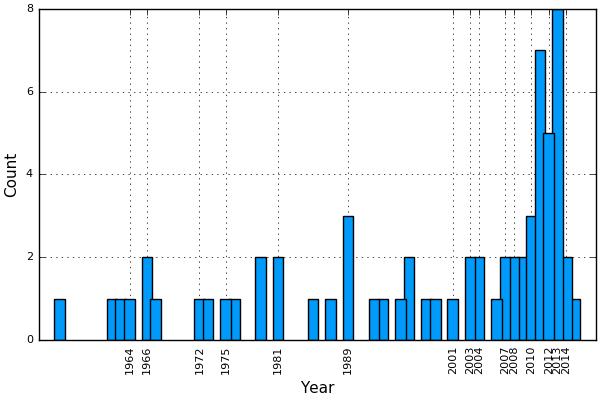

In [52]:
using Plots

dictKeys = collect(keys(yearCountDict))
dictValues = collect(values(yearCountDict))
    
fig = bar(dictKeys, dictValues, xticks=dictKeys, xrotation=90, label="", xlabel="Year", ylabel="Count")
    
fig

In this Notebook, we used the motivation of exploring a <i>.bib</i> file to learn some of the basics of Julia regarding strings, files and dictionaries.